In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
# dataset from https://www.kaggle.com/datamunge/sign-language-mnist/data#sign_mnist_test.csv
test = pd.read_csv("sign_mnist_test.csv")
train = pd.read_csv("sign_mnist_train.csv")
labels = [chr(i) for i in range(ord("A"),ord("Z")+1)] 

In [19]:
test_x = test.iloc[:, 1:]/255
test_y = test['label'].to_numpy()
train_x = train.iloc[:, 1:]/255
train_y = train['label'].to_numpy()

In [20]:
image_size = (28,28)
test_x = np.array([np.reshape(np.array(row[1]), image_size) for row in test_x.iterrows()])
train_x = np.array([np.reshape(np.array(row[1]), image_size) for row in train_x.iterrows()])

In [21]:
train_x.shape, len(train_y)tt

((27455, 28, 28), 27455)

In [22]:
test_x.shape, len(test_y)

((7172, 28, 28), 7172)

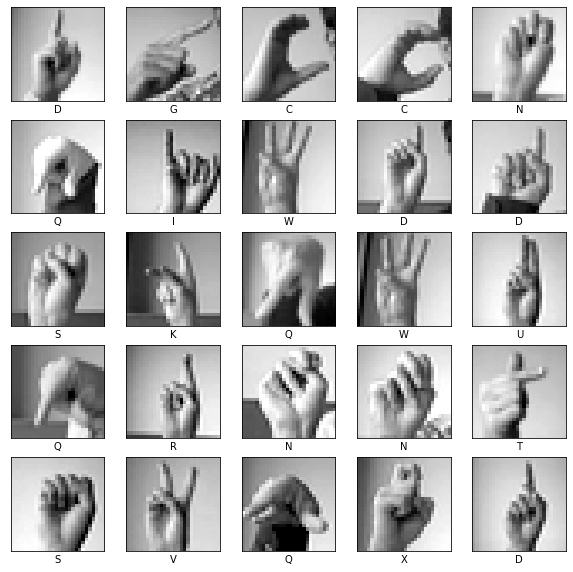

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap="gray")
    plt.xlabel(labels[train_y[i]])
plt.show()

In [75]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=image_size),
    keras.layers.Dense(128, activation='softplus'),
    keras.layers.Dense(len(labels), activation='softmax')
    ])

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.fit(train_x, train_y, epochs=10)

Train on 27455 samples
Epoch 1/10
27455/27455 [==============================] - 4s 162us/sample - loss: 1.8471 - accuracy: 0.4518
Epoch 2/10
27455/27455 [==============================] - 4s 137us/sample - loss: 0.9753 - accuracy: 0.7038
Epoch 3/10
27455/27455 [==============================] - 4s 151us/sample - loss: 0.7048 - accuracy: 0.7884
Epoch 4/10
27455/27455 [==============================] - 4s 159us/sample - loss: 0.5309 - accuracy: 0.8405
Epoch 5/10
27455/27455 [==============================] - 5s 170us/sample - loss: 0.3974 - accuracy: 0.8844
Epoch 6/10
27455/27455 [==============================] - 5s 194us/sample - loss: 0.3066 - accuracy: 0.9139
Epoch 7/10
27455/27455 [==============================] - 5s 183us/sample - loss: 0.2424 - accuracy: 0.9313
Epoch 8/10
27455/27455 [==============================] - 6s 217us/sample - loss: 0.1893 - accuracy: 0.9491
Epoch 9/10
27455/27455 [==============================] - 6s 212us/sample - loss: 0.1490 - accuracy: 0.9622
Epoch

In [78]:
predictions = model.predict(test_x)

In [79]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

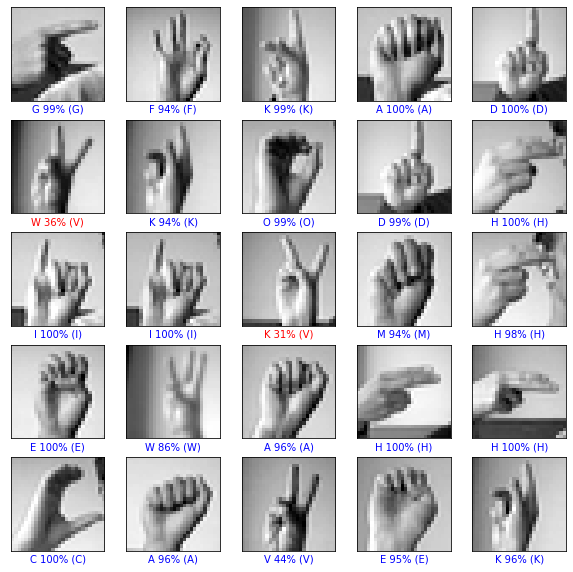

In [80]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, test_y, test_x)
    
plt.show()

In [81]:
(np.argmax(predictions, axis=1) == test_y).mean()

0.7154210819854991